In [52]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importowanie csv do ramki danych
patients = pd.read_csv('diabetes.csv')
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# analiza danych statystycznych
print(patients.describe())
print(patients.info())
print(patients.isnull().values.any())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<AxesSubplot:>

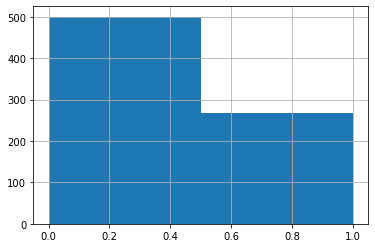

In [54]:
# rozkład cukrzycy
patients['Outcome'].hist(bins=2) 

<AxesSubplot:>

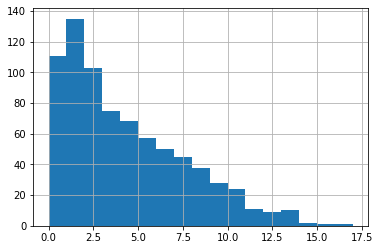

In [55]:
# rozkład ciąży
patients['Pregnancies'].hist(bins=17) 

<AxesSubplot:>

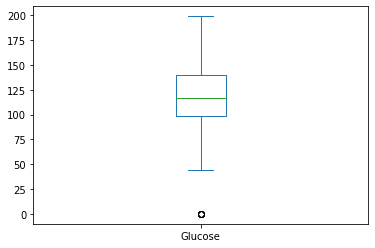

In [56]:
# rozkład danych z uwzglednieniem glukozy
patients['Glucose'].plot.box() 

<AxesSubplot:ylabel='Density'>

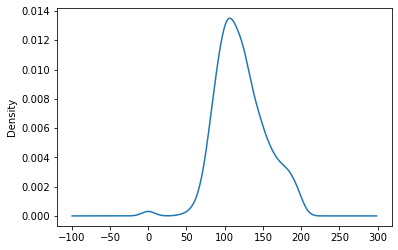

In [57]:
patients['Glucose'].plot.kde()

<AxesSubplot:>

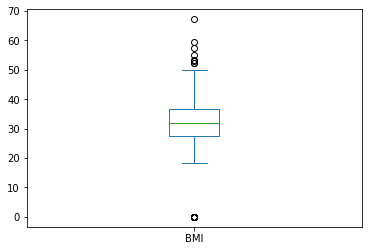

In [58]:
# rozkład danych z uwzglednieniem bmi
patients['BMI'].plot.box() 

<AxesSubplot:ylabel='Density'>

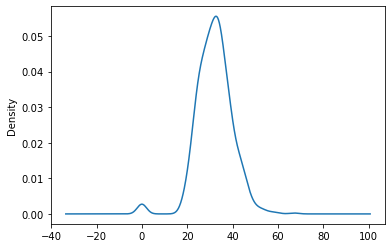

In [59]:
patients['BMI'].plot.kde()

<AxesSubplot:>

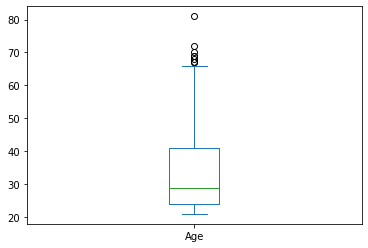

In [60]:
# rozkład danych z uwzglednieniem wieku
patients['Age'].plot.box() 

<AxesSubplot:ylabel='Density'>

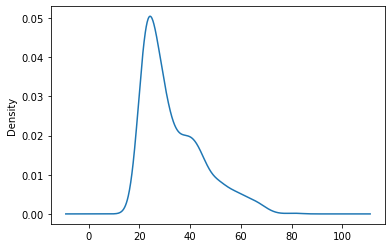

In [61]:
patients['Age'].plot.kde()

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

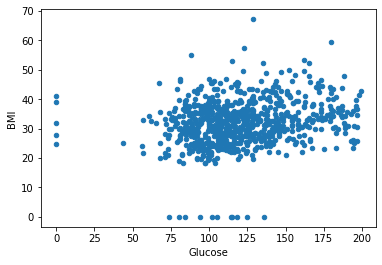

In [62]:
patients.plot.scatter(x='Glucose', y='BMI')


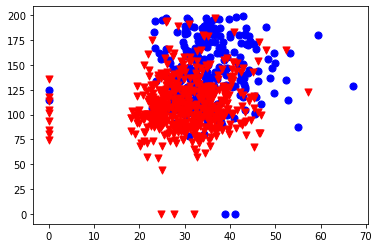

In [63]:
high = patients[['BMI','Glucose']][patients['Outcome']>=1]
low = patients[['BMI','Glucose']][patients['Outcome']<=0]
 
plt.scatter(high['BMI'],high['Glucose'],s=50,c='blue',marker='o',label='great')
plt.scatter(x=low['BMI'],y=low['Glucose'],s=50,c='red',marker='v',label='poor')

In [64]:
corr_matrix = patients.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

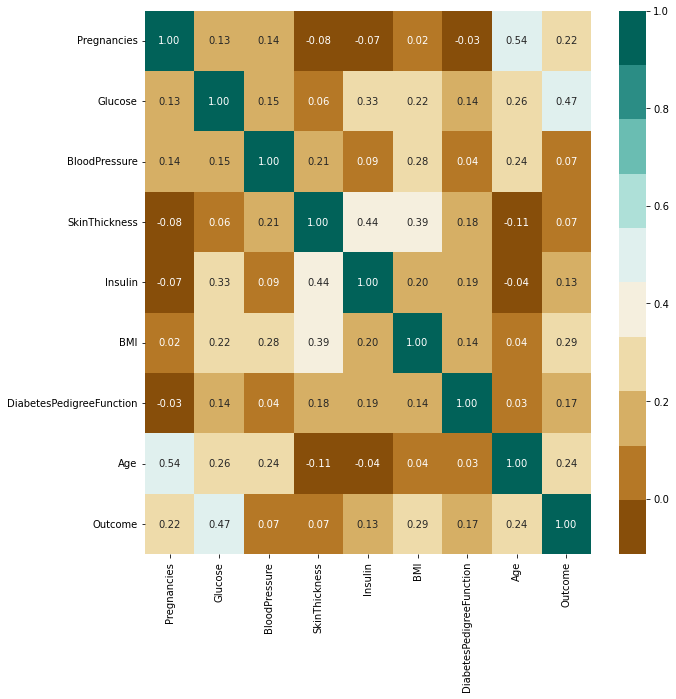

In [65]:
# wyznaczenie macierzy korelacji

correlations = patients.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(patients.columns);

plt.show()

In [66]:
# uzupełnienie pustych wartości
patients.fillna(patients.mean(), inplace=True)
patientsCopy = patients.copy()

In [67]:
# wymieszanie danych przed podziałem na zbiory 
patients = patients.sample(frac=1)

In [68]:
# zbiór danych
X = patients.drop('Outcome', axis=1).to_numpy()
X

array([[4.000e+00, 9.400e+01, 6.500e+01, ..., 2.470e+01, 1.480e-01,
        2.100e+01],
       [0.000e+00, 1.180e+02, 6.400e+01, ..., 0.000e+00, 1.731e+00,
        2.100e+01],
       [0.000e+00, 1.890e+02, 1.040e+02, ..., 3.430e+01, 4.350e-01,
        4.100e+01],
       ...,
       [1.000e+00, 1.260e+02, 6.000e+01, ..., 3.010e+01, 3.490e-01,
        4.700e+01],
       [0.000e+00, 1.170e+02, 0.000e+00, ..., 3.380e+01, 9.320e-01,
        4.400e+01],
       [1.000e+00, 1.150e+02, 7.000e+01, ..., 3.460e+01, 5.290e-01,
        3.200e+01]])

In [69]:
# zbiór etykiet
y = patients.loc[:, 'Outcome'].to_numpy()
y

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [70]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [71]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [72]:
# MODEL 1 - regresja logistyczna 
heartAttacklogisticRegresion = linear_model.LogisticRegression()
accuracy = train_model(linear_model.LogisticRegression(max_iter=300), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.8378378378378378, 0.8378378378378378, 0.8378378378378378, 0.7662337662337663]


In [73]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.8648648648648649, 0.8421052631578947, 0.8533333333333334, 0.7857142857142857]


In [74]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.7837837837837838, 0.90625, 0.8405797101449275, 0.7857142857142857]


<AxesSubplot:>

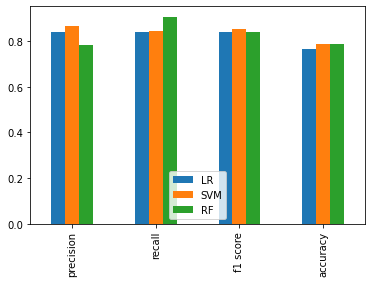

In [75]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [76]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.8378378378378378, 0.808695652173913, 0.8230088495575221, 0.7402597402597403]


In [77]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [78]:
# działania korygujące - hiperparametry

#LR DEAFULT
accuracy = train_model(linear_model.LogisticRegression(max_iter=300), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR default: ", accuracy)

# MODEL 7 - Support Logistic Regression
accuracy = train_model(linear_model.LogisticRegression(class_weight ='balanced', penalty = 'none'), X_train, y_train, X_test)
accuracy_compare['LR'] = accuracy
print ("LR class_weight=balanced, penalty=none" , accuracy)

#SVM DEFAULT
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM default:" , accuracy)

# MODEL 8 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

LR default:  [0.8378378378378378, 0.8378378378378378, 0.8378378378378378, 0.7662337662337663]
LR class_weight=balanced, penalty=none [0.7207207207207207, 0.8602150537634409, 0.7843137254901962, 0.7142857142857143]
SVM default: [0.8648648648648649, 0.8421052631578947, 0.8533333333333334, 0.7857142857142857]
SVM degree=4 [1.0, 0.7207792207792207, 0.8377358490566037, 0.7207792207792207]


C:\Users\barte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
import pickle

with open('diabetes_prediction.pickle', 'wb') as handle:
    pickle.dump(heartAttacklogisticRegresion, handle)

In [81]:
patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
629,4,94,65,22,0,24.7,0.148,21,0
371,0,118,64,23,89,0.0,1.731,21,0
440,0,189,104,25,0,34.3,0.435,41,1
632,2,111,60,0,0,26.2,0.343,23,0
167,4,120,68,0,0,29.6,0.709,34,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
39,4,111,72,47,207,37.1,1.390,56,1
766,1,126,60,0,0,30.1,0.349,47,1
336,0,117,0,0,0,33.8,0.932,44,0
